In [1]:
# importing the necessery Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.stattools import durbin_watson


import statsmodels.api as sm  # to train the model
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check the VIF
import statsmodels.stats.api as sms # to check the hetroscaditisity
from scipy.stats import shapiro # to check the normality

plt.style.use('default')


In [2]:
# importing the dataset
df= pd.read_csv('original_Jamboree_Admission.csv')
df.head(15)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# 1.Basic Analysis 

## A.) Shape,Statistical summary

In [3]:
# information cheking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


1. There are zero null values 
2. There are no missing Values
3. Shape of data is 500 x 8

`since the serial number will reduandent Column will not lead to any informaion so we will drop this column`


In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

Chaning the naes to more short name

In [5]:
df=df.rename(columns={'Chance of Admit ' : 'Chance', 'LOR ':'LOR','University Rating':'UR','GRE Score':'GRE','TOEFL Score':'TOEFL'})

In [6]:
df.describe()

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Converting the Chance into categorical valribale for further analysis
# converting all into categories like 30-40,40-50,60-70,50-60,70-80,80-90,90-100
df['chances%']=pd.cut(df['Chance'],bins=[i for i in np.arange(0.3,1.1,0.1)],labels=[f'{i}-{i+10}' for i in range(30,100,10)])

In [8]:
df

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance,chances%
0,337,118,4,4.5,4.5,9.65,1,0.92,90-100
1,324,107,4,4.0,4.5,8.87,1,0.76,70-80
2,316,104,3,3.0,3.5,8.00,1,0.72,70-80
3,322,110,3,3.5,2.5,8.67,1,0.80,70-80
4,314,103,2,2.0,3.0,8.21,0,0.65,60-70
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,80-90
496,337,117,5,5.0,5.0,9.87,1,0.96,90-100
497,330,120,5,4.5,5.0,9.56,1,0.93,90-100
498,312,103,4,4.0,5.0,8.43,0,0.73,70-80


In [9]:
# calculating the min and maximum values of each column for furthur analysis
df.groupby('chances%')[['GRE','TOEFL','UR','SOP','LOR','CGPA','Research','Chance']].agg(['min','max'])

C:\Users\ahuja\AppData\Local\Temp\ipykernel_22016\3588884262.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('chances%')[['GRE','TOEFL','UR','SOP','LOR','CGPA','Research','Chance']].agg(['min','max'])


GRE      TOEFL       UR      SOP       LOR       CGPA        \
          min  max   min  max min max  min  max  min  max   min   max   
chances%                                                                
30-40     295  315    96  105   1   3  2.0  5.0  1.5  3.5  6.80  8.03   
40-50     290  323    93  110   1   4  1.0  4.0  1.0  3.5  7.20  8.60   
50-60     295  325    92  112   1   4  1.0  4.5  1.5  4.5  7.23  8.92   
60-70     293  327    95  115   1   5  1.5  5.0  1.5  5.0  7.40  9.22   
70-80     300  334    98  116   1   5  1.5  5.0  2.0  5.0  7.89  9.16   
80-90     312  340   104  120   2   5  2.0  5.0  1.5  5.0  8.44  9.70   
90-100    320  340   110  120   4   5  3.0  5.0  3.5  5.0  9.06  9.92   

         Research     Chance        
              min max    min   max  
chances%                            
30-40           0   1   0.34  0.39  
40-50           0   1   0.42  0.50  
50-60           0   1   0.51  0.60  
60-70           0   1   0.61  0.70  
70-80           0   1   0.71  0.80  
80-90           0   1   0.81  0.90  
90-100          1   1   0.91  0.97

`Results from this Summary`

    1. for GRE score above 300 there are 80 % chances.
    2. Research work is must for increasing you chances above 90%
    3. for 90% chances your CGPA must be above 9.

## B) Checking of Outliers

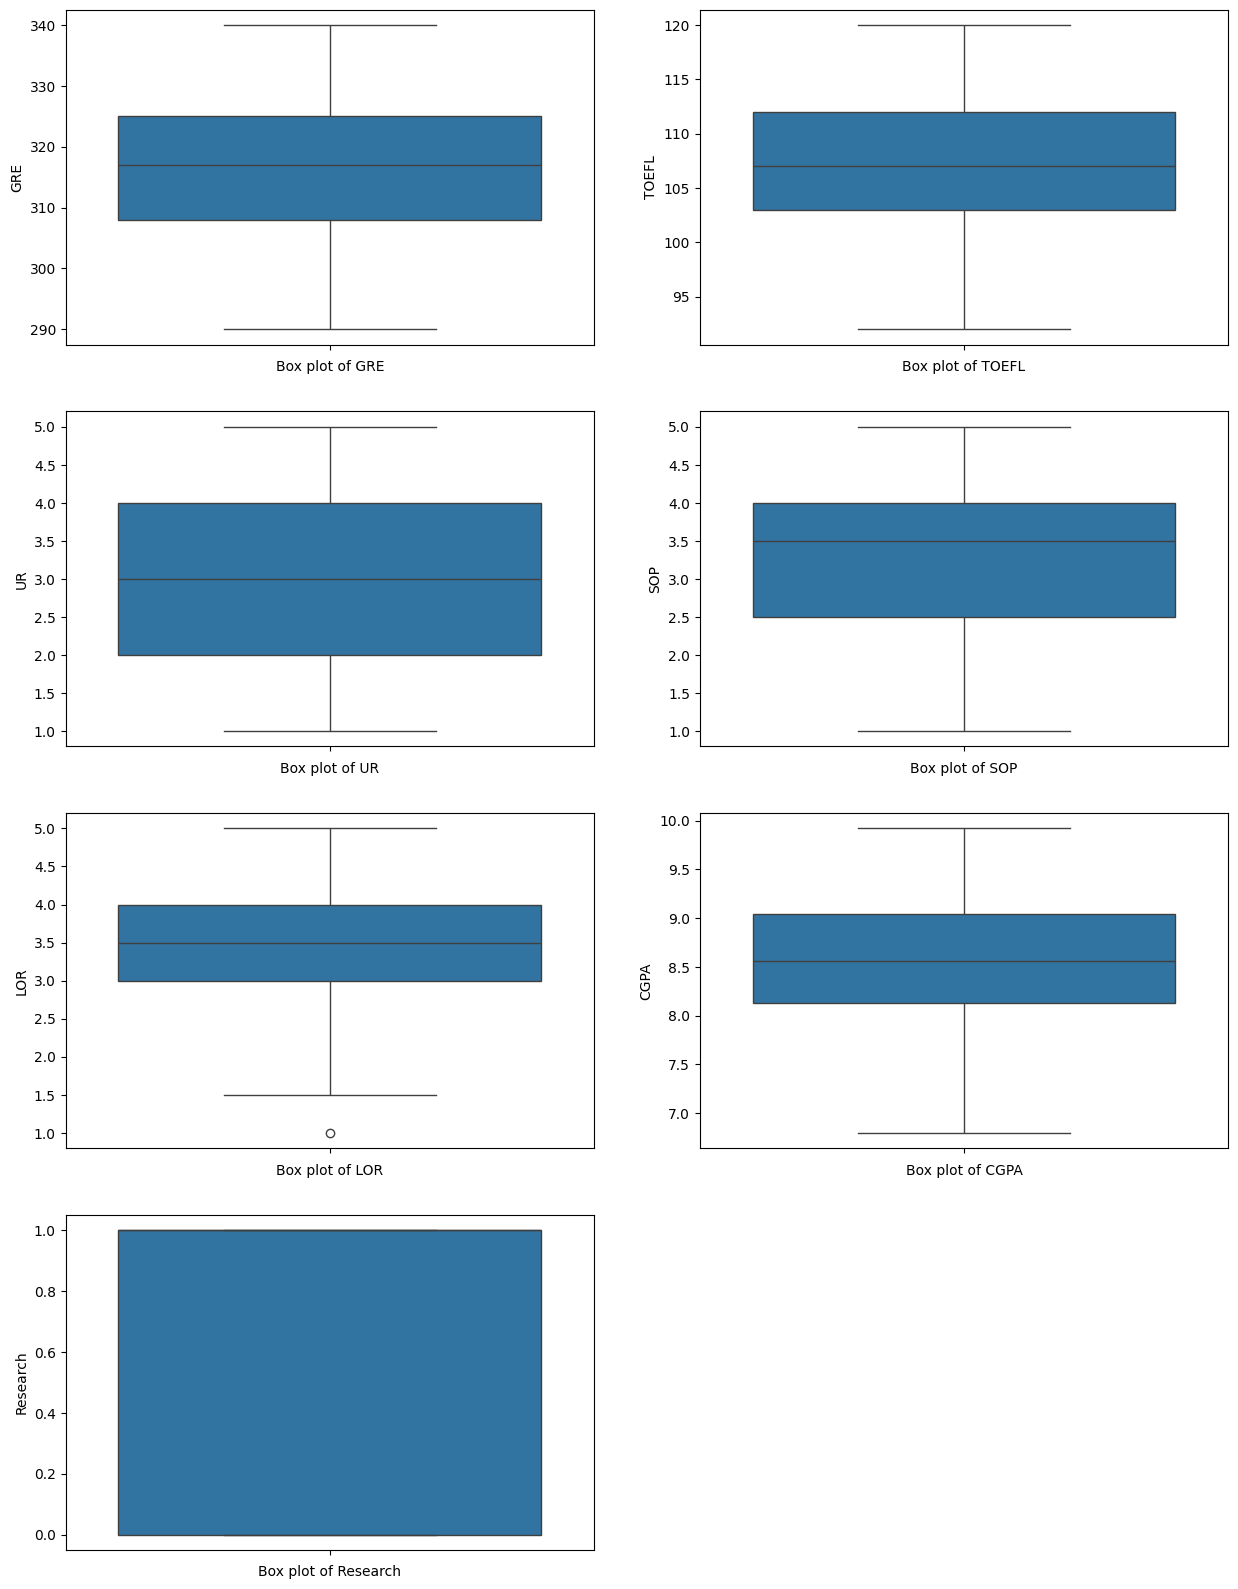

In [10]:
plt.figure(figsize=(15,20))
count=1
for i in ['GRE','TOEFL','UR','SOP','LOR','CGPA','Research']:
    plt.subplot(4,2,count)
    sns.boxplot(data=df, y=i)
    plt.xlabel(f'Box plot of {i}')
    count+=1
plt.show( )

* ````There are no outliers present in the Dataset````




















# 2. Univariate and Bivariate Plots

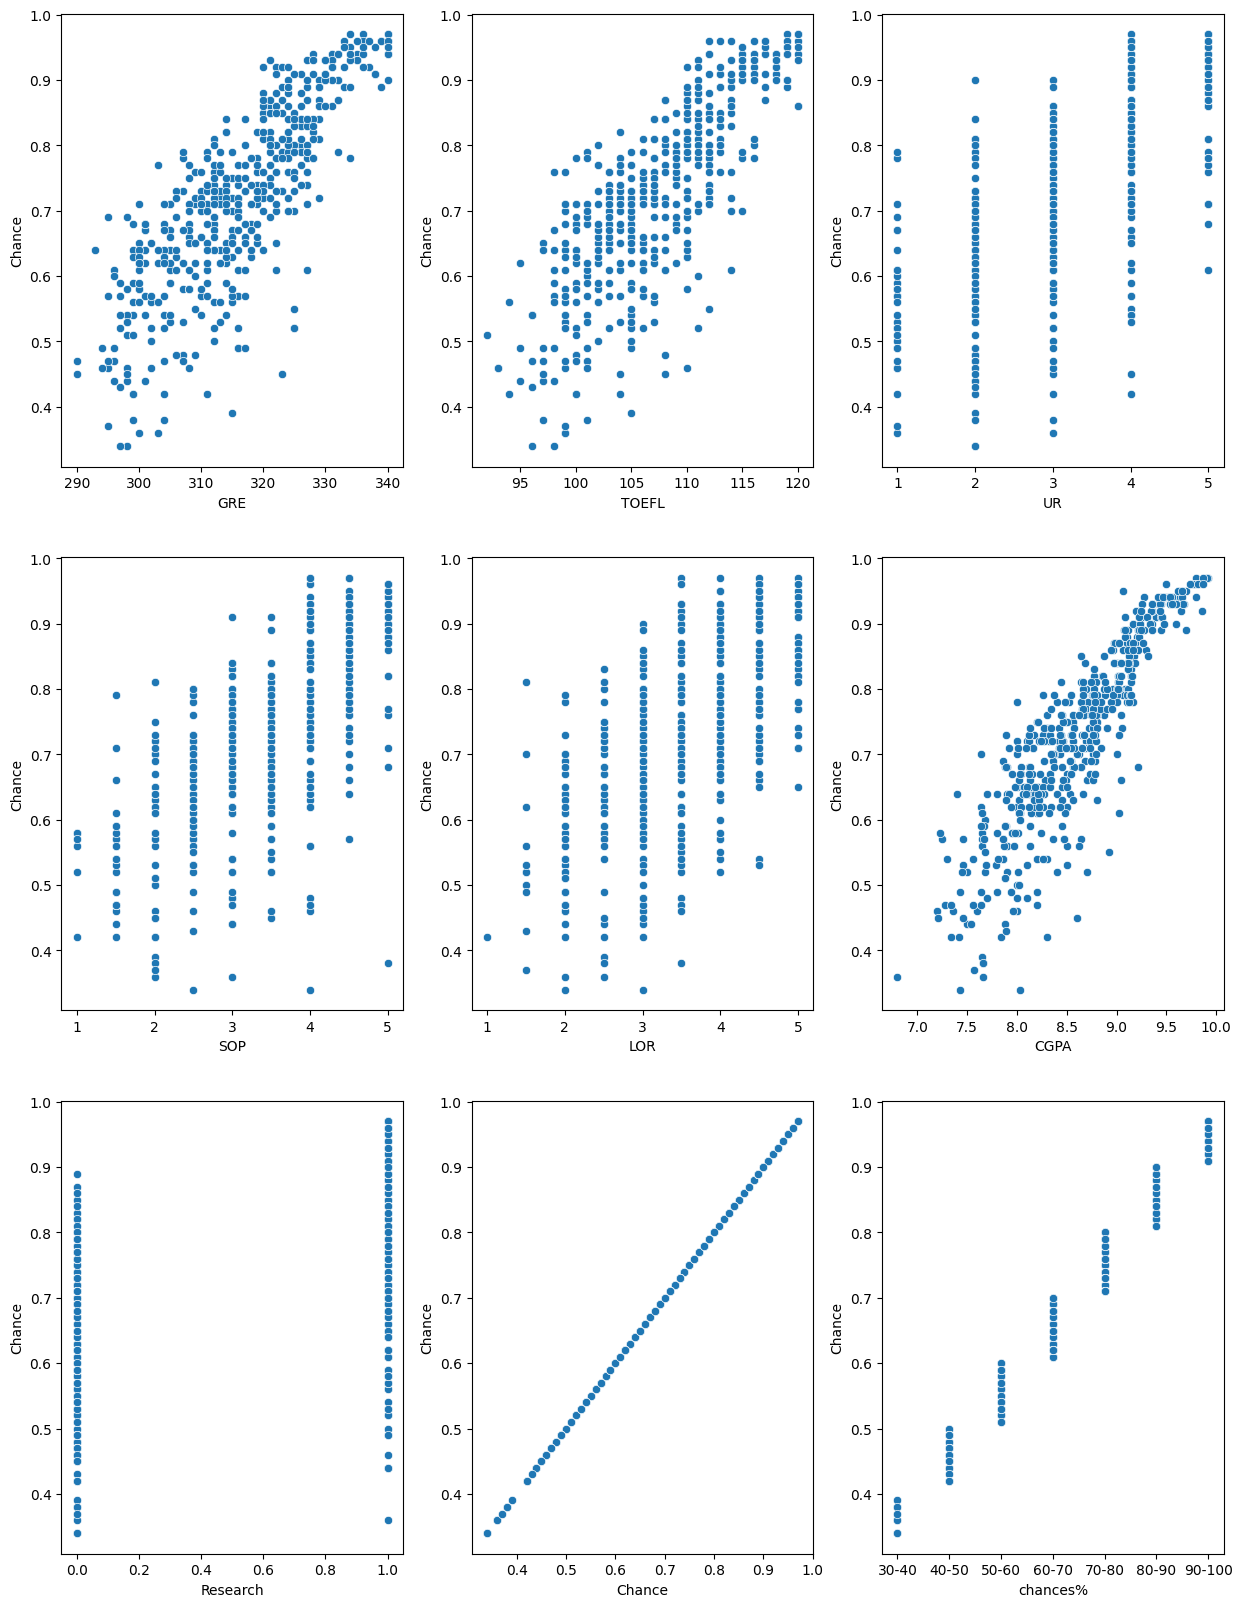

In [11]:
plt.figure(figsize=(15,20))
place=1
for i in df.columns:
    plt.subplot(3,3,place)
    sns.scatterplot(data=df,y='Chance',x=i)
    place+=1
plt.show()

1. Chances of getting selected are proportional to GRE and TOFEL score.
2. Chances of getting selected are proportionally steep with CGPA.

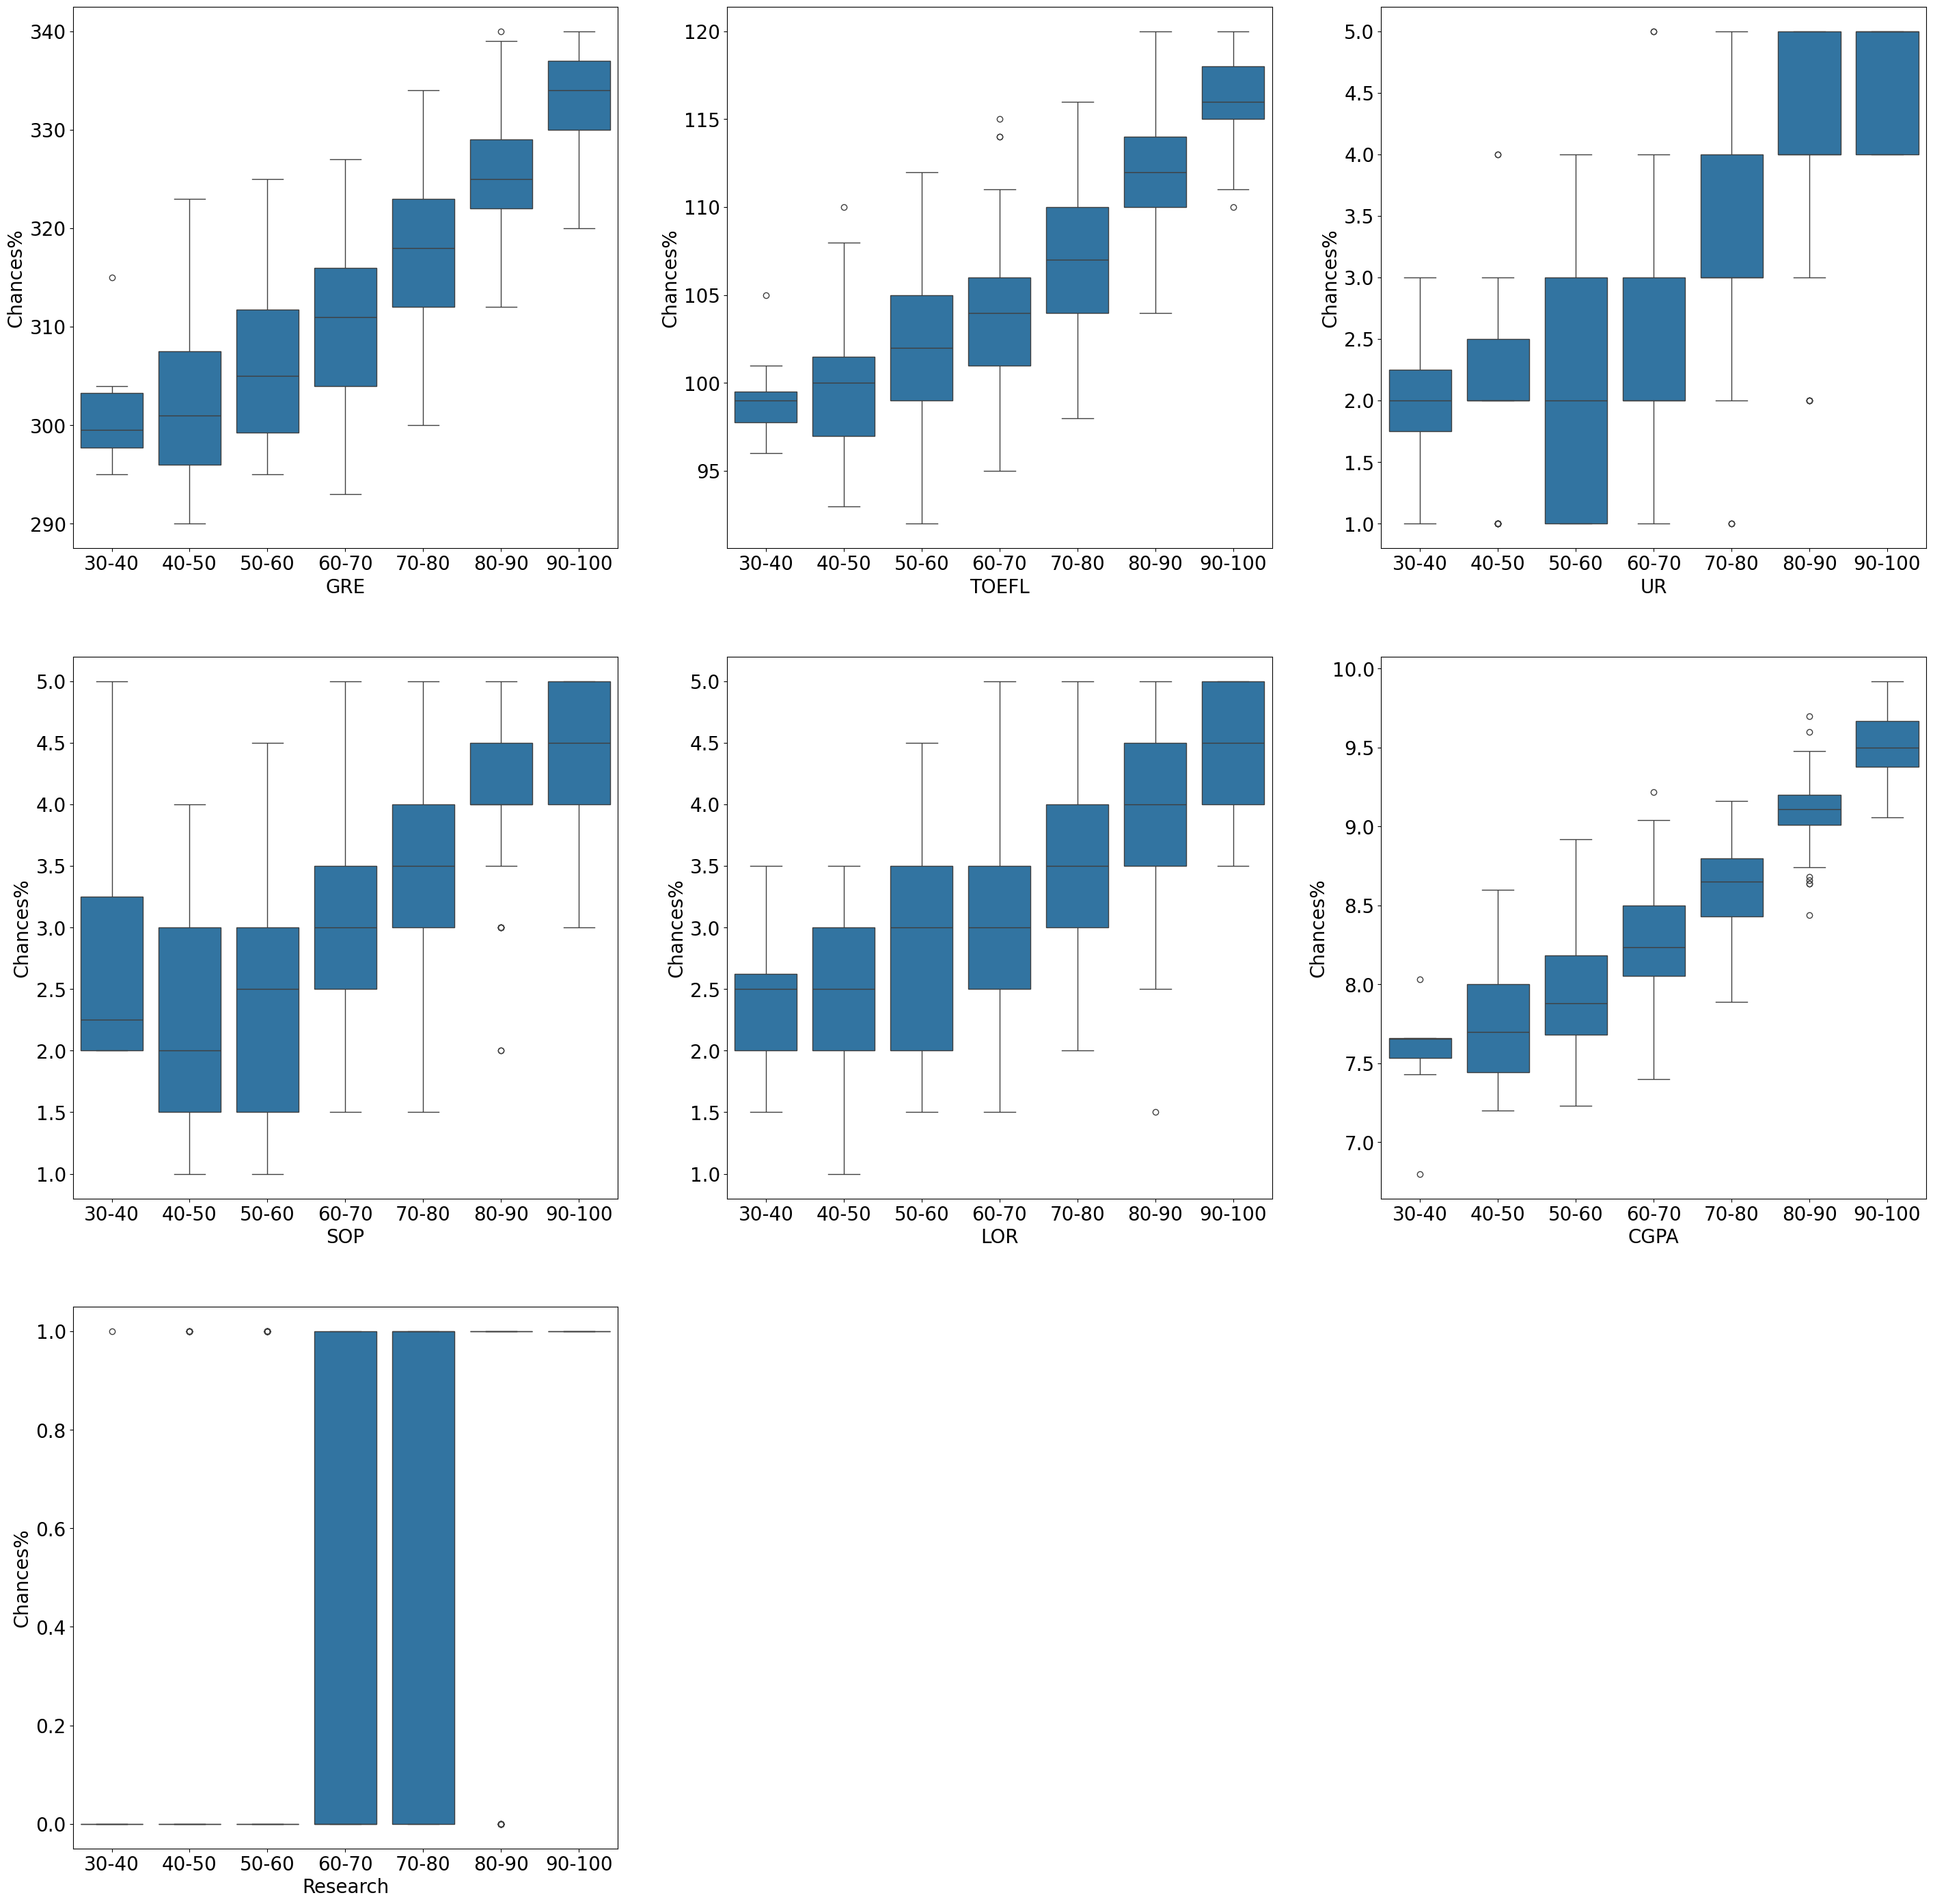

In [12]:
plt.figure(figsize=(35,35))
place=1
for i in df.columns[:-2]:
    plt.subplot(3,3,place)
    ax = sns.boxplot(data=df,y=i,x='chances%')
    ax.set_xlabel(xlabel=i,fontsize = 20)
    ax.set_ylabel(ylabel='Chances%',fontsize = 20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    place+=1
plt.show()

Results are moreover the same as previous

## Checking the correlation

<Axes: >

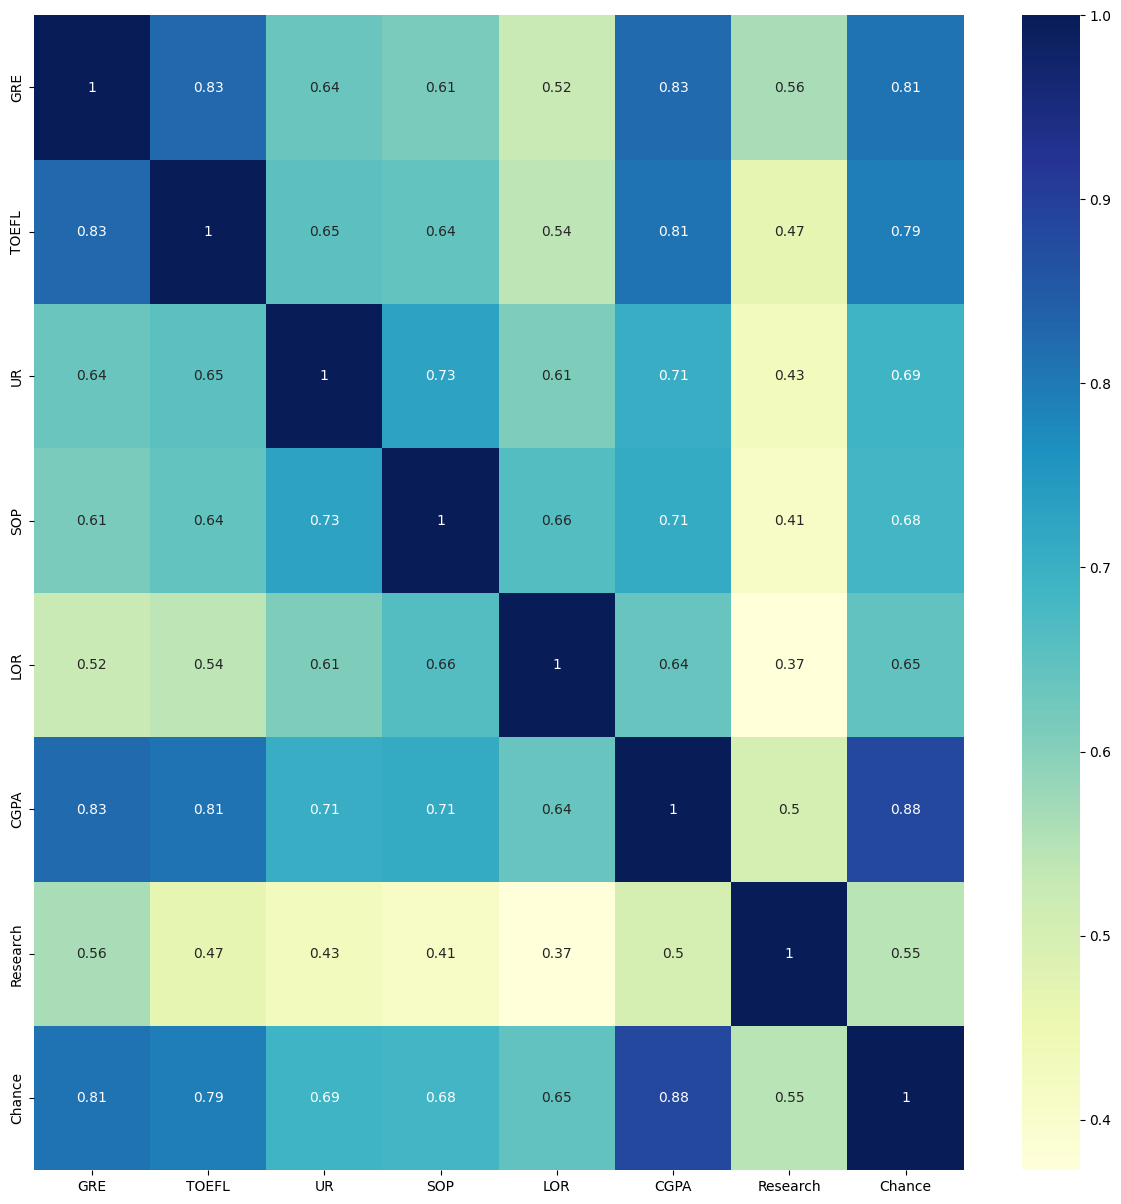

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='YlGnBu',annot=True)

* CGPA and chances are most effect on chances of getting admission.
* after CGPA the GRE and TOFEL score has the most Chances

# 

# 

# 3. Data Preprocessing

## A) Duplicates Values Check

In [14]:
df.drop_duplicates()

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,Chance,chances%
0,337,118,4,4.5,4.5,9.65,1,0.92,90-100
1,324,107,4,4.0,4.5,8.87,1,0.76,70-80
2,316,104,3,3.0,3.5,8.00,1,0.72,70-80
3,322,110,3,3.5,2.5,8.67,1,0.80,70-80
4,314,103,2,2.0,3.0,8.21,0,0.65,60-70
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,80-90
496,337,117,5,5.0,5.0,9.87,1,0.96,90-100
497,330,120,5,4.5,5.0,9.56,1,0.93,90-100
498,312,103,4,4.0,5.0,8.43,0,0.73,70-80


There are no Duplicates Present in Data

## B) Missing values check and Treatment

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GRE       500 non-null    int64   
 1   TOEFL     500 non-null    int64   
 2   UR        500 non-null    int64   
 3   SOP       500 non-null    float64 
 4   LOR       500 non-null    float64 
 5   CGPA      500 non-null    float64 
 6   Research  500 non-null    int64   
 7   Chance    500 non-null    float64 
 8   chances%  500 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 32.2 KB


since all column has 500 values `**There are no missing values present in data**`

## C) Feature Engineering and Data Preprocessing 

In [114]:
df_new=df.copy()

In [115]:
data = df_new.drop(['chances%'],axis=1)

In [116]:
x= data.drop(['Chance'],axis=1)
y=data['Chance']

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [118]:
scaler=StandardScaler()

In [119]:
scaler.fit(x_train,y_train)

StandardScaler()

In [120]:
x_tr_sc = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

In [121]:
x_te_sc = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

# 4. Model Building

## A) Model Building with Linear Regression model

In [122]:
 #Print all the performance metrics for linear regression models
def get_metrics(x, y_true, model,r = None):
    """Calculate and print MAE, RMSE, R2, and Adjusted R2."""
    y_pred = model.predict(x)
    
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - R2) * (len(y_pred) - 1) / (len(y_pred) - x.shape[1] - 1)
    if r != None:
        print(f'-----------------Regression Type: {r}----------------')

    print(f'MAE:{MAE : 0.5f}')
    print(f'RMSE:{RMSE : 0.5f}')
    print(f'R2:{R2: 0.5f}')
    print(f'Adjusted R2:{adjusted_r2: 0.5f}')

    cols = list(np.array(x_te_sc.columns))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})

    print(f'Intercept: {model.intercept_}')
    print("Coefficients: ")
    print(coef_df)
    print("-"*50)

In [123]:

model=LinearRegression()
# Training with train data
model.fit(x_tr_sc,y_train)

LinearRegression()

In [124]:
get_metrics(x_tr_sc,y_train,model,'Linear')

-----------------Regression Type: Linear----------------
MAE: 0.04162
RMSE: 0.05764
R2: 0.83390
Adjusted R2: 0.83093
Intercept: 0.7228499999999999
Coefficients: 
     Column      Coef
0       GRE  0.017504
1     TOEFL  0.020415
2        UR  0.004867
3       SOP -0.000446
4       LOR  0.014562
5      CGPA  0.076288
6  Research  0.011896
--------------------------------------------------


In [125]:
# r2 score of model on test data
get_metrics(x_te_sc,y_test,model,'Linear')

-----------------Regression Type: Linear----------------
MAE: 0.04650
RMSE: 0.06690
R2: 0.76905
Adjusted R2: 0.75148
Intercept: 0.7228499999999999
Coefficients: 
     Column      Coef
0       GRE  0.017504
1     TOEFL  0.020415
2        UR  0.004867
3       SOP -0.000446
4       LOR  0.014562
5      CGPA  0.076288
6  Research  0.011896
--------------------------------------------------


In [126]:
pd.DataFrame(data=[[x] for x in model.coef_],index=x_tr_sc.columns,columns=['VIF'])

,VIF
GRE,0.017504
TOEFL,0.020415
UR,0.004867
SOP,-0.000446
LOR,0.014562
CGPA,0.076288
Research,0.011896


## B) Model Training with ordinary least squares

In [127]:
# adding a constant to the model of training
x_tr_sc_sm = sm.add_constant(x_tr_sc)
y_tr_sm = np.array(y_train)

# adding a constant to the model of testing
x_te_sc_sm = sm.add_constant(x_te_sc)
y_te_sm= np.array(y_test)


sm_model = sm.OLS(y_tr_sm,x_tr_sc_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.64e-148
Time:                        21:03:05   Log-Likelihood:                 573.86
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     392   BIC:                            -1100.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7229      0.003    248.305      0.0

* P values
* Ho =  Feature is not important
* Ha = Feature is important

Here P values of SOP column is very high so we will remove the SOP column

In [128]:
x_tr_sc_sm_new = x_tr_sc_sm.drop(['SOP'],axis=1)
x_te_sc_sm_new = x_te_sc_sm.drop(['SOP'],axis=1)

In [129]:
sm_model_new = sm.OLS(y_tr_sm,x_tr_sc_sm_new).fit()
print(sm_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     328.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.72e-150
Time:                        21:03:07   Log-Likelihood:                 573.85
No. Observations:                 400   AIC:                            -1134.
Df Residuals:                     393   BIC:                            -1106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7229      0.003    248.619      0.0

In [132]:
y_pred_sm = sm_model_new.predict(x_te_sc_sm_new)

In [133]:
print(f'Model Score on Train Data : {sm_model.rsquared}')
print(f'Model Score on Test Data: {r2_score(y_te_sm,y_pred_sm)}')
print(f'R2_Score : {r2_score(y_te_sm,y_pred_sm)}')
print(f'Mean Squared Error : {mean_squared_error(y_te_sm,y_pred_sm)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_te_sm,y_pred_sm)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_te_sm,y_pred_sm))}')
print(f'Adjusted R2_Score :{sm_model.rsquared_adj}')

Model Score on Train Data : 0.8338983982280342
Model Score on Test Data: 0.7691916381981583
R2_Score : 0.7691916381981583
Mean Squared Error : 0.004472537500571166
Mean Absolute Error : 0.046494795156691776
Root Mean Squared Error : 0.06687703268365879
Adjusted R2_Score :0.830932298196392


# 5) Assumptions checking of Linear Regression

## 1.Assumption of Linearity

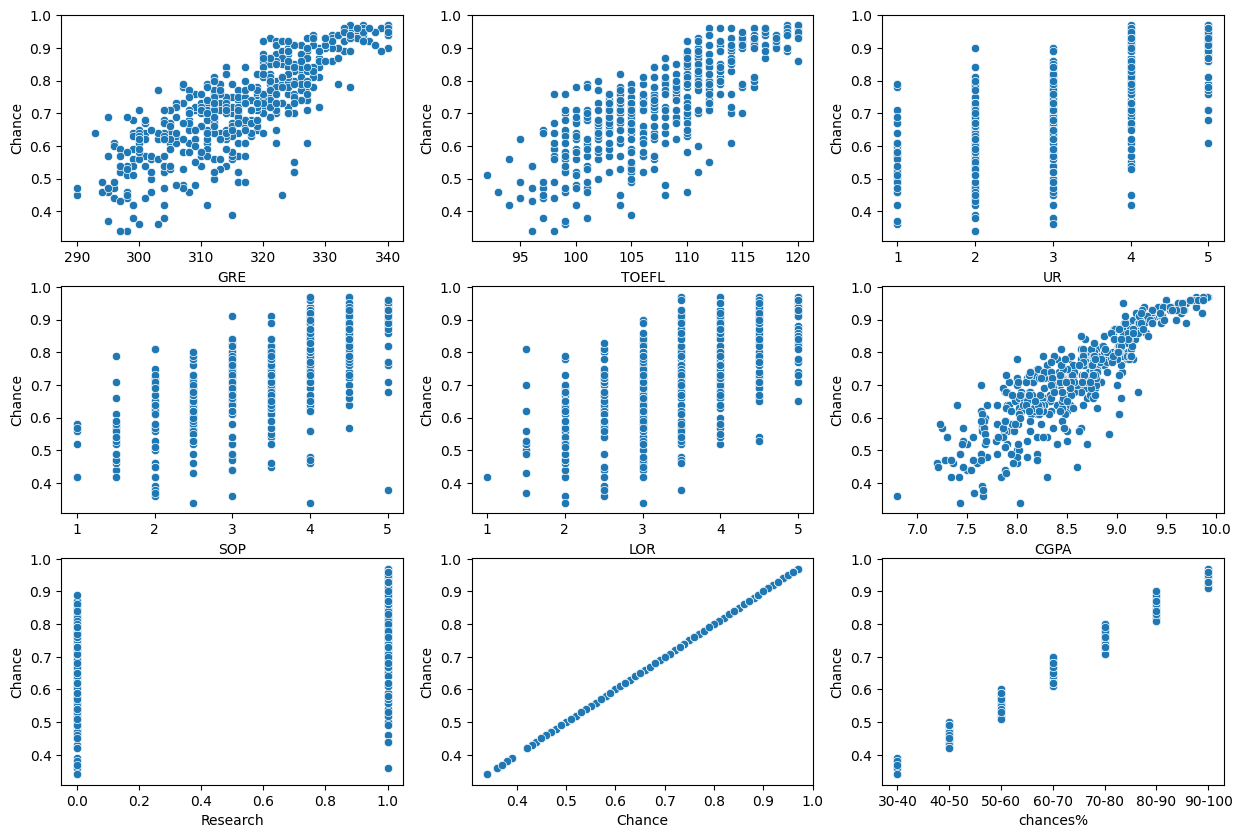

In [32]:
plt.figure(figsize=(15,10))
place=1
for i in df.columns:
    plt.subplot(3,3,place)
    sns.scatterplot(data=df,y='Chance',x=i)
    place+=1
plt.show()

* TOEFL score, GRE score , CGPA are linear To the dependent variable of chances
* SOP and University ranking also approx linear to dependent variable
* Research does not look like its much effecting the relationship between chances and research but we will consider it

` All the variables are linear to the dependent variable Hence assumption 1 is cleared`

## 2. Non multi-collinear features

In [134]:
vif=pd.DataFrame()
vif['Features'] = x_tr_sc_sm_new.columns
vif['VIF'] = [round(variance_inflation_factor(x_tr_sc_sm_new.values,i),2) for i in range(x_tr_sc_sm_new.shape[1])]
vif

,Features,VIF
0,const,1.00
1,GRE,4.87
2,TOEFL,4.04
3,UR,2.22
4,LOR,1.85
5,CGPA,5.23
6,Research,1.48


* All the VIF for all the features having VIF < 5, so there are no Major Multi-collinear relations.

## 3. Assumptions of Errors are normally distributed

In [34]:
y_pred = sm_model.predict(x_tr_sc_sm)
errors = -y_tr_sm + y_pred

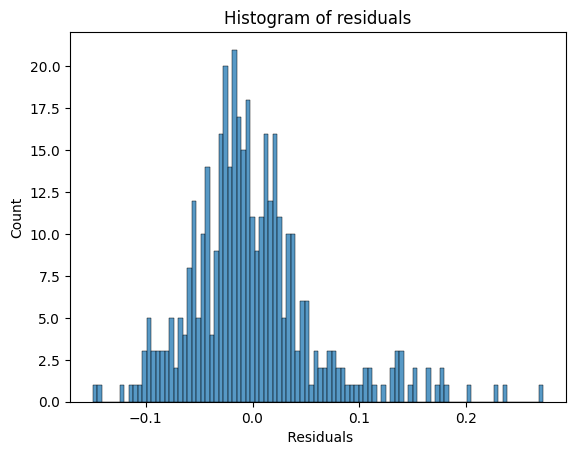

In [35]:
sns.histplot(errors,bins=100)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

* Visually it looks like there is Normality in errors
* The histogram and Q-Q plot of residuals for Linear Regression show the following:
The histogram indicates that the residuals are approximately normally distributed. The Q-Q plot shows that the points are mostly aligned along the straight line,
further confirming the normality of residuals.


We will be confirming the Error normality by shapiro test

-Checking the normality for **Errors**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The Errors has the normal distribution 
        * Ha = The Err has the not normal distribution 

In [36]:
shapiro(errors)

ShapiroResult(statistic=0.9310524260444065, pvalue=1.2455924786465057e-12)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **Errors not normally distributed**.

## 4.Heteroskedasticity should not exist

Text(0.5, 1.0, 'Predicted values vs Residuals')

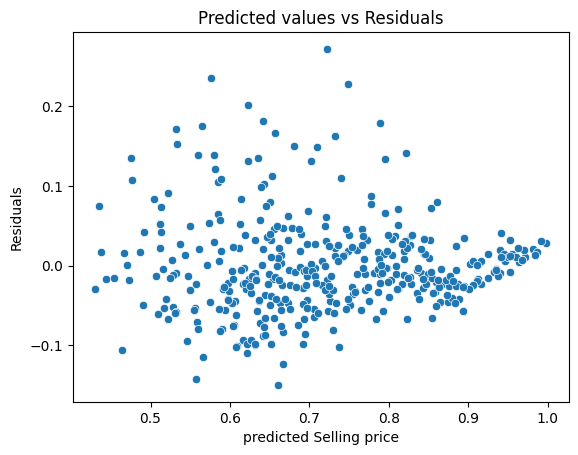

In [37]:
sns.scatterplot(x=y_pred,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right,the spread of  errors is almost constant

##### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions

#### Using Goldfeld Quandt Test to check homoskedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.


Null and Alternate Hypothesis of Goldfeld-Quandt Test

    * Null Hypothesis: Heteroscedasticity is not present.
    * Alternate Hypothesis: Heteroscedasticity is present.

In [38]:
sms.het_goldfeldquandt(y_tr_sm,x_tr_sc_sm)

(1.042028868565688, 0.3878793438793884, 'increasing')

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.387indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

## 5. No Autocorrelation

#### Checking for The mean of residuals is nearly zero 

In [39]:
np.mean(errors)

4.260480856999038e-16

Errors are normally distributed with a mean value of 0


#### Checking for the Linearity of variables

<Axes: xlabel='None', ylabel='None'>

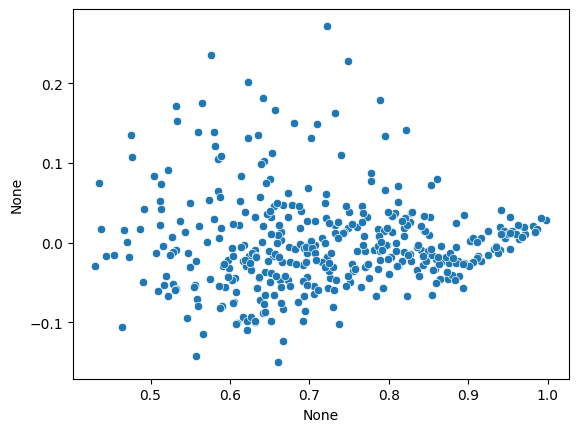

In [40]:
sns.scatterplot(x=y_pred,y=errors)

errors are linear and with y predicted

We will check the autocorrelation with durbin-watson statistics

* The Durbin Watson statistic is a test statistic used in statistics to detect autocorrelation in the residuals from a regression analysis.
* The Durbin Watson statistic will always assume a value between 0 and 4. A value of DW = 2 indicates that there is no autocorrelation.

The hypotheses followed for the Durbin Watson statistic:

H(0) = First-order autocorrelation does not exist.

H(1) = First-order autocorrelation exists

The assumptions of the test are:

Errors are normally distributed with a mean value of 0



In [41]:
np.mean(errors)

4.260480856999038e-16

Errors are normally distributed with a mean value of 0

In [42]:
durbin_watson(errors)

1.9634445607660518

* The test statistic is 1.9634. Since this is within the range of 1.5 and 2.5, we would consider `autocorrelation not to be problematic in this regression model`.

# 6) Trying the model with ridge and lasso regression 

In [43]:
def Model_training(x_train,y_train,x_test,y_test, regression_type='Linear', compareFeatures=False):
    if regression_type == 'Lasso':
        model = Lasso(alpha=0.0001)
    elif regression_type == 'Ridge':
        model = Ridge(alpha=1.0)
    else:
        model = LinearRegression()
    model.fit(x_train, y_train)
    #Compare scaled features
    if compareFeatures == True:
        imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),
        columns=['feature', 'coeff'])
        sns.barplot(x='feature', y='coeff', data=imp)
    plt.xticks(rotation=90)
 
    print(f'Performace metrics for the train dataset: ')
    
    get_metrics(x_train, y_train, model , regression_type)
    print()
    print(f' Performace metrics for the test dataset: ')
    #print(f'-------------------------------------------')
    get_metrics(x_test, y_test, model , regression_type)

## A) Lasso Regularization ( L1 regularization)

Using K fold to find the perfet regularization rate

In [44]:
alpha_rr = [0.00001,0.0001,0.001,0.01,0.1,1,10]
k_fold =KFold(n_splits=5)

In [45]:
def adj_r2_score(x_test,y_test,R):
    return 1 - (1-R)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1)

In [46]:
train_score = []
test_score = []
for alpha in alpha_rr:
    lasso_model =  Lasso(alpha=alpha) 
    
    fold_train_score = []
    fold_test_score = []
    
    for train_index, val_index in k_fold.split(x_train):
        #print(train_index,val_index)
        
        x_tra, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
        y_tra, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        polyreg_scaled = make_pipeline(scaler, lasso_model)
        polyreg_scaled.fit(x_tra, y_tra)
        trainscore = adj_r2_score(x_tra, y_tra, polyreg_scaled.score(x_tra, y_tra))
        valscore= adj_r2_score(x_val, y_val, polyreg_scaled.score(x_val, y_val))
        fold_train_score.append(trainscore)
        fold_test_score.append(valscore)
    train_score.append(np.mean(fold_train_score))
    test_score.append(np.mean(fold_test_score))    

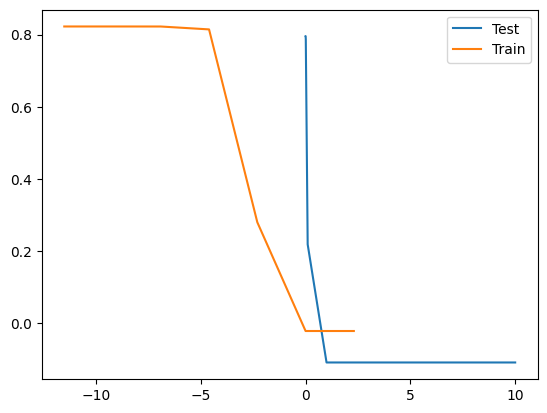

In [47]:
plt.plot([10**x for x in range(-5,2)],test_score,label='Test')
plt.plot([np.log(10**x) for x in range(-5,2)],train_score,label='Train')
plt.legend(loc='upper right')
plt.show()

We will use Regularization rate = 0.0001

Performace metrics for the train dataset: 
-----------------Regression Type: Lasso----------------
MAE: 0.04300
RMSE: 0.05976
R2: 0.82559
Adjusted R2: 0.82248
Intercept: 0.7184
Coefficients: 
     Column      Coef
0       GRE  0.027357
1     TOEFL  0.011014
2        UR  0.005760
3       SOP  0.005949
4       LOR  0.013928
5      CGPA  0.072070
6  Research  0.010808
--------------------------------------------------

 Performace metrics for the test dataset: 
-----------------Regression Type: Lasso----------------
MAE: 0.04068
RMSE: 0.05922
R2: 0.79706
Adjusted R2: 0.78162
Intercept: 0.7184
Coefficients: 
     Column      Coef
0       GRE  0.027357
1     TOEFL  0.011014
2        UR  0.005760
3       SOP  0.005949
4       LOR  0.013928
5      CGPA  0.072070
6  Research  0.010808
--------------------------------------------------


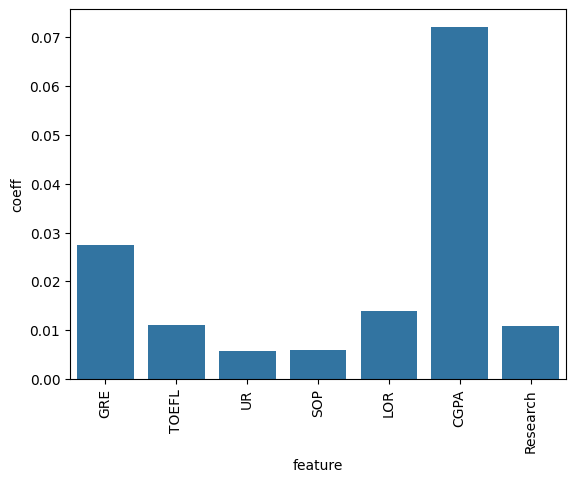

In [48]:
Model_training(x_tr_sc,y_train,x_te_sc,y_test, regression_type='Lasso', compareFeatures=True)

## B) Ridge Regularization ( L2 regularization)

Performace metrics for the train dataset: 
-----------------Regression Type: Ridge----------------
MAE: 0.04301
RMSE: 0.05976
R2: 0.82559
Adjusted R2: 0.82247
Intercept: 0.7184
Coefficients: 
     Column      Coef
0       GRE  0.027441
1     TOEFL  0.011304
2        UR  0.005887
3       SOP  0.006089
4       LOR  0.014034
5      CGPA  0.071381
6  Research  0.010901
--------------------------------------------------

 Performace metrics for the test dataset: 
-----------------Regression Type: Ridge----------------
MAE: 0.04065
RMSE: 0.05922
R2: 0.79711
Adjusted R2: 0.78167
Intercept: 0.7184
Coefficients: 
     Column      Coef
0       GRE  0.027441
1     TOEFL  0.011304
2        UR  0.005887
3       SOP  0.006089
4       LOR  0.014034
5      CGPA  0.071381
6  Research  0.010901
--------------------------------------------------


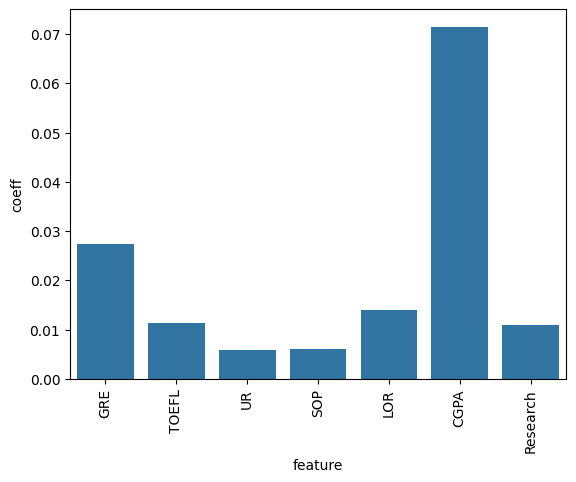

In [49]:
Model_training(x_tr_sc,y_train,x_te_sc,y_test, regression_type='Ridge', compareFeatures=True)

# Insights from EDA:

1. **Strong Correlations :** The strong correlations between CGPA, GRE Score, and TOEFL Score suggest that academic performance and proficiency in English are closely related to each other. High GRE & TOEFL scores for high CGPA students might indicate that students who perform well academically tend to also score higher on standardized tests.
<br>

2. The strongest correlation is between CGPA and ”Chance of Admit’, so CGPA is the most important factor in deciding the admission of the candidate, followed by GRE score and TOEFL score.
<br>
3. Linear Regression has the highest R-squared score among the evaluated models, indicating a strong ability to predict the ‘Chance of Admit’ from the given features.
<br>
4. Ridge Regression also performs similarly to Linear Regression in this case, with a slight difference in R-squared score and RMSE. This similarity suggests that the regularization introduced by Ridge does not significantly alter the predictions for this particular dataset,possibly because multicollinearity is not a severe issue or the optimal alpha value is close to the one chosen.
<br>
5. Lasso Regression shows a lower R-squared score compared to the other models, which indicates that the level of regularization (controlled by alpha=0.0001) might be too strong.
# Distributions:

6) The distributions of GRE Score, TOEFL Score, and CGPA are fairly normal but slightly
left-skewed, indicating most Jamboree students have above-average scores.
7) The Chance of Admit distribution is also somewhat left-skewed, suggesting that most
Jamboree students have a higher likelihood of admission.

# Recommendations:
1. All assumptions of Linear Regression model are satisfied and we can safely use Linear Regression model.
2. Model trained has very less values of RMSE, MSE & Adjusted R2 score and give accurate prediction.
3. Company needs to collect more data for improving accuracy and reducing biasing of model.
4. More features shall be introduced for collected data.
5. Feature importance of Linear regression model tells us that CGPA score is most important factor followed by Research paper publishing.
6. Students needs to do more focus on their CGPA and Reserach paper publishing for improving chances of graduate admission.
7. University rating, SOP and GRE score have not much importance for getting admission
